<a href="https://colab.research.google.com/github/laughingbud/conquer/blob/main/GWP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
plt.rcParams["figure.figsize"] = (12, 9)

In [3]:
!git clone https://github.com/laughingbud/conquer.git

Cloning into 'conquer'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 9 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [4]:
data_set = pd.read_csv('conquer/fin_data_set.csv')
data_set2 = pd.read_csv('conquer/fin_data_set_2.csv')

Defining the challenges in modeling and predicting financial variables



Multi-collinearity
- When more than than two financial variables that are supposed to be independent in a multi regression, have linear correlation

Skewness
- A tendency of a financial variable to have symmetric or assymetric distribution in a dataset

Sensitivity to outliers
-  A tendency of a predicted financial variable that may show different predicted value when an extreme value of predictor financial variable is included in regression.

Overfitting
- Overfitting is a modeling mistake that introduces bias into the model because it is too closely related to the data set. Overfitting occurs when a statistical model fits exactly against its training data.

**Four Challenges**

**1. Multi-collinearity**
- Financial returns can quite often show high correlation during times of market stress which is usually short-lived. However, when these independent variables (returns) are significantly correlated on a longer time horizon, it can cause model estimates to be biased. Demonstration and diagram below:

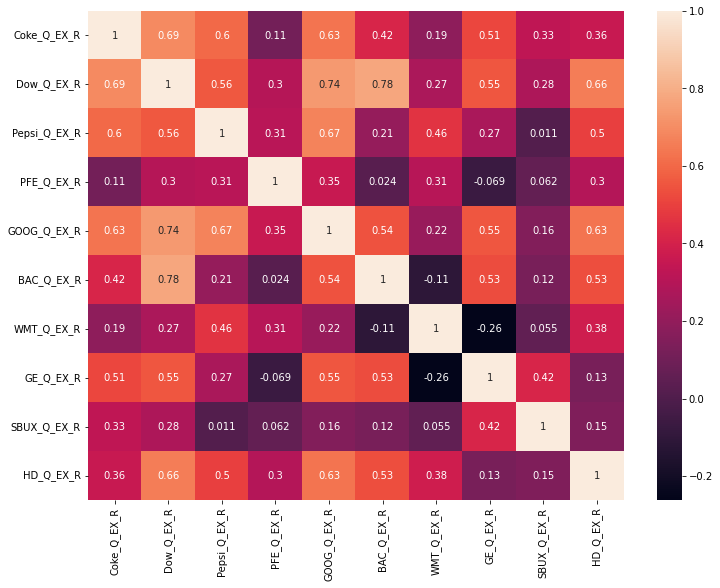

In [6]:
sns.heatmap(data_set2[["Coke_Q_EX_R","Dow_Q_EX_R","Pepsi_Q_EX_R","PFE_Q_EX_R","GOOG_Q_EX_R","BAC_Q_EX_R","WMT_Q_EX_R","GE_Q_EX_R","SBUX_Q_EX_R","HD_Q_EX_R"]].corr(), annot=True)
plt.show()

In the correlation matrix, there are many pairs having moderate correlation. If they are modeled together as independent variables in a regression, they will cause multicollinearity problem. Below, we run a simple OLS regression to further demonstrate the issue.

In [14]:
model_1 = smf.ols(
    "Coke_Q_EX_R ~ Dow_Q_EX_R + Pepsi_Q_EX_R + REV_Q_R + GOOG_Q_EX_R + BAC_Q_EX_R + WMT_Q_EX_R + GE_Q_EX_R + SBUX_Q_EX_R",
    data=data_set2,
).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     2.798
Date:                Mon, 28 Nov 2022   Prob (F-statistic):             0.0482
Time:                        14:37:21   Log-Likelihood:                 39.396
No. Observations:                  22   AIC:                            -60.79
Df Residuals:                      13   BIC:                            -50.97
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0059      0.017     -0.337      0.742      -0.043       0.032
Dow_Q_EX_R       0.7091      0.471      1.504      0.156      -0.309       1.727
Pepsi_Q_EX_R     0.2686      0.267      1.005      0.333      -0.309       0.846
REV_Q_R          0.1007      0.121      0.834      0.419      -0.160       0.362
GOOG_Q_EX_R      0.0233      0.208      0.112      0.912      -0.425       0.472
BAC_Q_EX_R      -0.0762      0.156     -0.487      0.634      -0.414       0.262
WMT_Q_EX_R      -0.1313      0.213     -0.617      0.548      -0.591       0.328
GE_Q_EX_R       -0.0040      0.106     -0.037      0.971      -0.234       0.226
SBUX_Q_EX_R      0.0824      0.135      0.608      0.554      -0.210       0.375
==============================================================================
Omnibus:                        1.980   Durbin-Watson:                   2.255
Prob(Omnibus):                  0.372   Jarque-Bera (JB):                1.638
Skew:                          -0.628   Prob(JB):                        0.441
Kurtosis:                       2.543   Cond. No.                         45.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
# Parameters with 6 significant digits
model_1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.005859,0.017409,-0.336544,0.741831,-0.043469,0.031751
Dow_Q_EX_R,0.709085,0.471371,1.504303,0.156406,-0.309250,1.727419
Pepsi_Q_EX_R,0.268625,0.267324,1.004868,0.333299,-0.308893,0.846144
REV_Q_R,0.100740,0.120734,0.834399,0.419126,-0.160090,0.361570
GOOG_Q_EX_R,0.023328,0.207589,0.112377,0.912241,-0.425141,0.471798
BAC_Q_EX_R,-0.076156,0.156360,-0.487054,0.634329,-0.413950,0.261639
WMT_Q_EX_R,-0.131313,0.212743,-0.617238,0.547737,-0.590916,0.328290
GE_Q_EX_R,-0.003975,0.106396,-0.037365,0.970762,-0.233830,0.225879
SBUX_Q_EX_R,0.082359,0.135423,0.608162,0.553557,-0.210205,0.374923


None of coefficients seem significant as p-value >0.05. R^2 is decent, 63% but adjusted R^2 is low. Below we run Variance inflation factor analysis to further diagnose the multicollinearity problem.

In [8]:
labels = ["Intercept","Dow_Q_EX_R","Pepsi_Q_EX_R","REV_Q_R","GOOG_Q_EX_R","BAC_Q_EX_R","WMT_Q_EX_R","GE_Q_EX_R","SBUX_Q_EX_R"]

variables = model_1.model.exog
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

pd.DataFrame(vif[1:], labels[1:], columns=["VIF"]).T

,Dow_Q_EX_R,Pepsi_Q_EX_R,REV_Q_R,GOOG_Q_EX_R,BAC_Q_EX_R,WMT_Q_EX_R,GE_Q_EX_R,SBUX_Q_EX_R
VIF,6.95744,2.748897,1.612413,3.241519,4.269485,2.18455,3.096815,1.511017


VIF > 5 indicates severe multi-collinearity issue with Dow Jones. From correlation analysis we saw Dow Jones has moderate correlation with majority of other variables, hence we can't rely on OLS regression estimates as variables are not independent.
**Directions** from here: We need to run a Principal Component Analysis to help mitigate the multicollinearity issue and keep only relevant variables in the regression. 

In [9]:
# Select 7 variables and standardise
pc = data_set2[["Dow_Q_EX_R","Pepsi_Q_EX_R","REV_Q_R","GOOG_Q_EX_R","BAC_Q_EX_R","WMT_Q_EX_R","GE_Q_EX_R","SBUX_Q_EX_R"]]
pca_data = preprocessing.scale(pc)
pca = PCA(n_components=8)
pca.fit(pca_data)

PCA(n_components=8)

In [10]:
# Get proportions of variance and cumulative proportion of variance
pr_var = pca.explained_variance_ratio_
cum_pr = np.cumsum(pca.explained_variance_ratio_)
ind = ["Proportion of variance", "Cumulative proportion of variance"]
cols = ["PC1", "PC2", "PC3", "PC4", "PC5", "PC6", "PC7", "PC8"]
pd.DataFrame(np.vstack((pr_var, cum_pr)), ind, columns=cols)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Proportion of variance,0.417539,0.193287,0.171490,0.108867,0.042000,0.028306,0.026893,0.011619
Cumulative proportion of variance,0.417539,0.610826,0.782316,0.891183,0.933183,0.961489,0.988381,1.000000


Six of eight principal components explain roughly 96% variance in Google Stock's return. Below we look at factor loadings of these variables and pick the relevant variables for our analysis. 

In [11]:
# Coefficients (Loadings) of 6 Principal Components
pc_res = pd.DataFrame(pca.components_.T, index=list(pc.columns), columns=cols)
pc_res

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Dow_Q_EX_R,-0.501013,-0.081975,-0.201491,-0.151476,-0.172552,-0.161302,-0.116793,-0.780570
Pepsi_Q_EX_R,-0.370323,-0.416369,0.215351,0.267349,0.486188,-0.340799,-0.423131,0.200210
REV_Q_R,-0.089143,0.205497,0.723855,0.314653,-0.525310,0.024685,-0.213269,-0.069342
GOOG_Q_EX_R,-0.481635,-0.115076,0.033447,0.219037,0.147889,0.789841,0.241922,0.037978
BAC_Q_EX_R,-0.399072,0.169106,-0.470595,-0.014795,-0.462351,-0.034008,-0.323626,0.520391
WMT_Q_EX_R,-0.116011,-0.659655,0.213805,-0.389464,-0.370728,-0.129019,0.392582,0.214001
GE_Q_EX_R,-0.399918,0.444523,0.093024,0.117590,0.150220,-0.440477,0.622124,0.127903
SBUX_Q_EX_R,-0.198186,0.321096,0.334835,-0.769979,0.249503,0.146820,-0.239618,0.106832


For PC1, Dow has highest absolute value of coefficient, hence has largest impact on PC1. Similarly, we pick Walmart, Coke revenue, Starbucks, Google. We remove Pepsi, BAC and GE from the model.

In [40]:
# Regression model to check multicollinearity among independent variables
results = smf.ols(
    "Coke_Q_EX_R ~ Dow_Q_EX_R + WMT_Q_EX_R + REV_Q_R + SBUX_Q_EX_R + GOOG_Q_EX_R",
    data=data_set2,
).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Coke_Q_EX_R   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     4.493
Date:                Mon, 28 Nov 2022   Prob (F-statistic):            0.00950
Time:                        17:50:21   Log-Likelihood:                 38.030
No. Observations:                  22   AIC:                            -64.06
Df Residuals:                      16   BIC:                            -57.51
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0109      0.014     -0.757      0.460      -0.042       0.020
Dow_Q_EX_R      0.6091      0.286      2.133      0.049       0.004       1.214
WMT_Q_EX_R     -0.0004      0.144     -0.003      0.998      -0.305       0.304
REV_Q_R         0.1418      0.103      1.380      0.186      -0.076       0.359
SBUX_Q_EX_R     0.0551      0.117      0.472      0.644      -0.193       0.303
GOOG_Q_EX_R     0.1060      0.177      0.600      0.557      -0.268       0.480
==============================================================================
Omnibus:                        1.148   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.563   Jarque-Bera (JB):                1.031
Skew:                          -0.466   Prob(JB):                        0.597
Kurtosis:                       2.493   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# Parameters with 6 significant digits
results.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,-0.010947,0.014453,-0.757396,0.459822,-0.041587,0.019693
Dow_Q_EX_R,0.609072,0.285505,2.133314,0.048731,0.003828,1.214315
WMT_Q_EX_R,-0.000428,0.143513,-0.002984,0.997656,-0.304663,0.303807
REV_Q_R,0.141773,0.102706,1.380374,0.186453,-0.075954,0.359499
SBUX_Q_EX_R,0.055075,0.116791,0.471565,0.643604,-0.192512,0.302661
GOOG_Q_EX_R,0.105976,0.176500,0.600429,0.556630,-0.268188,0.480140


Finally, we see that there is an improvement in adjusted R squared from 40.7% previously to 45.4%. This is effectively an improvement by a reduction in net penalty imposed by exogenous variables that were taken out from model.

**2. Sensitivity to outliers**
- Extreme values in the dataset may or may not impact the results. The ones that have relatively immaterial impact are not to be worried about. However, some extreme values (influential points) can significantly change the results in a regression model. These influential points need to be checked for their impact and treated for, as these could just be an erroneous entry or an actual extreme event. Below, we **demonstrate** three kind of extreme values and their impact on a best fit line in **diagrams**. 

In [36]:
# Generate 30 random points
np.random.seed(42)
n = 30
x = np.random.uniform(0, 5, n)
y = 1 + 3 * x + np.random.normal(0, 1, n)

# Add outlier at (2.5, 17)
x_with_out = np.append(x, 2.5)
y_with_out = np.append(y, 17)

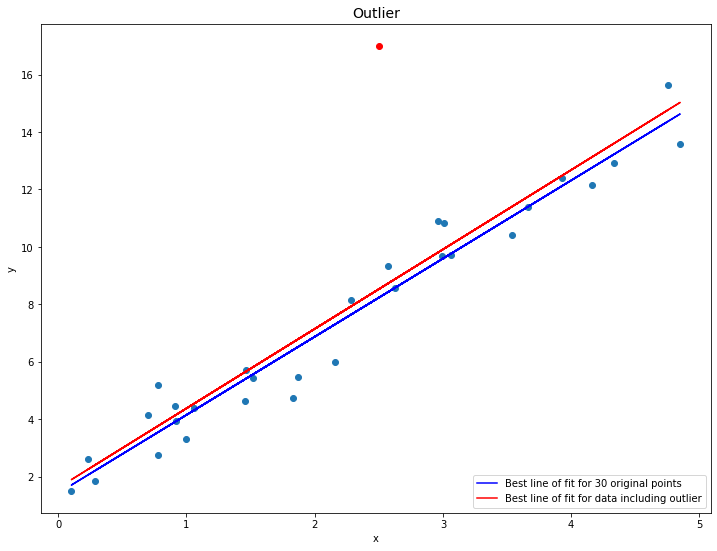

In [35]:
# Plot best line of fit for 30 original points only (in black) and for 30+outlier (in red)
plt.title("Outlier", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(2.5, 17, "ro")  # Outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(ao, bo) = np.polyfit(x_with_out, y_with_out, 1)
plt.plot(
    x_with_out,
    ao * x_with_out + bo,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

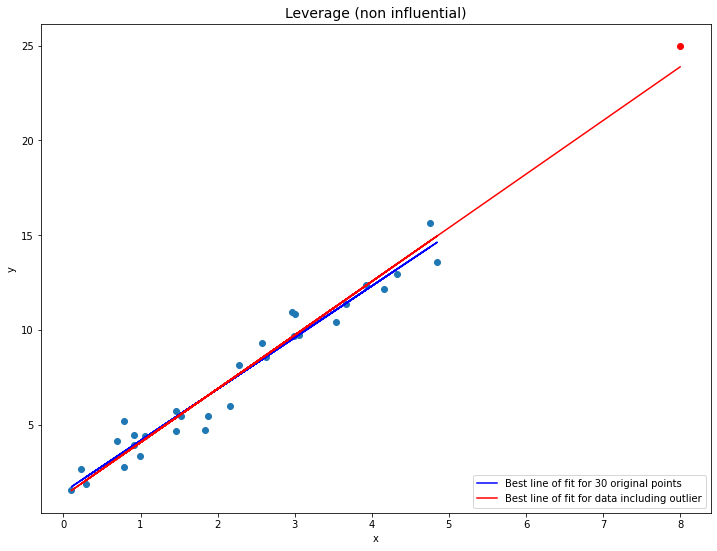

In [37]:
# Add non-influential leverage point at (8, 25)
x_with_lev = np.append(x, 8)
y_with_lev = np.append(y, 25)

# Plot best line of fit for 30 original points only (in black) and for 30+lev (in red)
plt.title("Leverage (non influential)", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(8, 25, "ro")  # non-influential outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(al, bl) = np.polyfit(x_with_lev, y_with_lev, 1)
plt.plot(
    x_with_lev,
    al * x_with_lev + bl,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

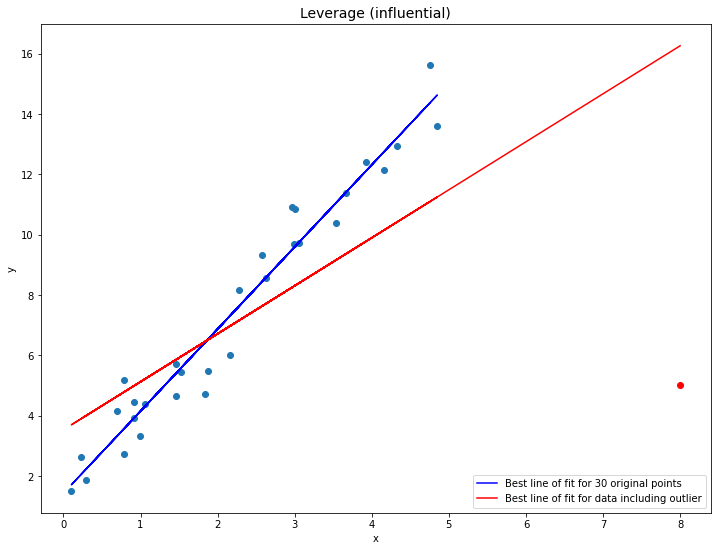

In [38]:
# Add non-influential leverage point at (8, 25)
x_with_inf = np.append(x, 8)
y_with_inf = np.append(y, 5)

# Plot best line of fit for 30 original points only (in black) and for 30+lev (in red)
plt.title("Leverage (influential)", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(8, 5, "ro")  # influential outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(ai, bi) = np.polyfit(x_with_inf, y_with_inf, 1)
plt.plot(
    x_with_inf,
    ai * x_with_inf + bi,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

- We **diagnose** for the outlier sensitivity in the three charts above. The Outlier and Leverage (non-influential) points have very small impact on a best fit line. However, Leverage (influential) point significantly alters the slope of the line. The red line includes the red dot (outlier) and the blue line is without including the outlier. 
- The **damage** or the impact is clear, most of those blue data-points will have significantly different predicted value and hence absolute value of residuals will be higher. Had we not included the outlier, the blue line looks very good fit having small residuals.
- The **directions** from here is we turn to identifying all influential points with the help of **Cook's distance**, which is a prediction difference from the model with and without a data-point. The higher the number in the influence plot below, the higher the impact it has on regression model estimate.

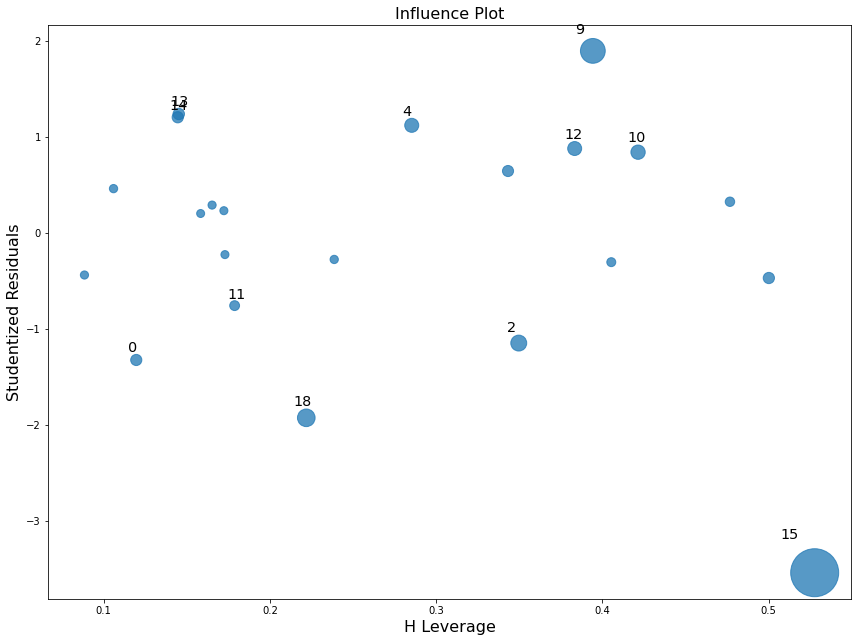

In [42]:
# Influence plot
fig = sm.graphics.influence_plot(results, criterion="cooks", alpha=0.5)
fig.tight_layout(pad=1.0)

In [44]:
# Finding most influential points
influence = results.get_influence()
inf_sum = influence.summary_frame().sort_values("cooks_d", ascending=False)
inf_sum.head(30)

,dfb_Intercept,dfb_Dow_Q_EX_R,dfb_WMT_Q_EX_R,dfb_REV_Q_R,dfb_SBUX_Q_EX_R,dfb_GOOG_Q_EX_R,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
15,-1.126347,2.967628,-1.125467,1.086511,0.093653,-1.334864,1.357546,-2.699862,0.527731,-2.853993,-3.542906,-3.745164
9,0.603631,0.166325,0.718302,-0.195677,0.504934,-0.902416,0.334769,1.756587,0.394294,1.417256,1.893120,1.527415
18,-0.305657,-0.741861,0.363077,-0.100522,-0.101105,0.354195,0.151203,-1.783461,0.221925,-0.952480,-1.929201,-1.030315
2,-0.479237,-0.622892,0.413400,0.071806,0.085998,0.511490,0.116341,-1.139262,0.349728,-0.835490,-1.150747,-0.843913
10,0.153103,-0.347919,-0.230260,-0.492280,0.506242,0.243689,0.086879,0.845857,0.421487,0.721992,0.837947,0.715240
4,0.401995,0.427383,0.083145,0.404800,-0.536656,-0.413013,0.081855,1.109050,0.285354,0.700806,1.117651,0.706241
12,0.162388,0.014312,0.140599,0.405186,0.314176,-0.192125,0.080689,0.882454,0.383363,0.695797,0.876016,0.690721
13,0.310492,-0.000455,0.107823,-0.017255,-0.356377,-0.044747,0.041859,1.215845,0.145223,0.501152,1.235705,0.509338
14,0.179110,-0.135008,-0.267156,-0.190660,-0.024425,0.281681,0.039602,1.185497,0.144620,0.487456,1.201850,0.494180
7,-0.370030,-0.014766,0.327939,-0.040195,-0.008281,0.158859,0.039192,-0.484774,0.500158,-0.484928,-0.472866,-0.473016


In the **influence plot**, the X-axis of the plot is hat value which measures the difference between the exogenous values of a data point and the mean of exogenous values in the dataset. On Y-axis of the plot is studentized residuals. These are the standardized residuals from the predicted endogenous value of the data point from the model. The bubbles in the plot indicate the size of the *Cook’s D* for each point. The bigger the bubble, the higher the *Cook’s D* for a data point. 

We can see that Point 15 and Point 9 have the highest *Cook’s D* values. Between these two, Point 15 has a *Cook’s D* of 1.36, so we consider it an influential point.

**Overfitting**

Overfitting is a modeling mistake that introduces bias into the model because it is too closely related to the data set. Overfitting occurs when a statistical model fits exactly against its training data.

**Example 1 of overfitting.** 



In order to better understand Overfitting, will use an example that compares the two. This example demonstrates the problems of underfitting and overfitting and how we can use linear regression with polynomial features to approximate nonlinear functions. The plot shows the function that we want to approximate, which is a part of the cosine function. In addition, the samples from the real function and the approximations of different models are displayed. The models have polynomial features of different degrees. We can see that a linear function (polynomial with degree 1) is not sufficient to fit the training samples. This is called **underfitting**. A polynomial of degree 4 approximates the true function almost perfectly. However, for higher degrees the model will **overfit** the training data, i.e. it learns the noise of the training data. We evaluate quantitatively **overfitting / underfitting** by using cross-validation. We calculate the mean squared error (MSE) on the validation set, the higher, the less likely the model generalizes correctly from the training data.

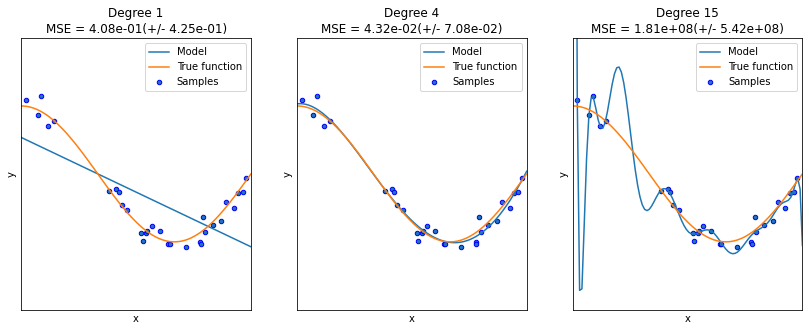

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

**How to Detect Overfitting**

A key challenge with overfitting, and with machine learning in general, is that we can’t know how well our model will perform on new data until we actually test it.

To address this, we can split our initial dataset into separate training and test subsets.
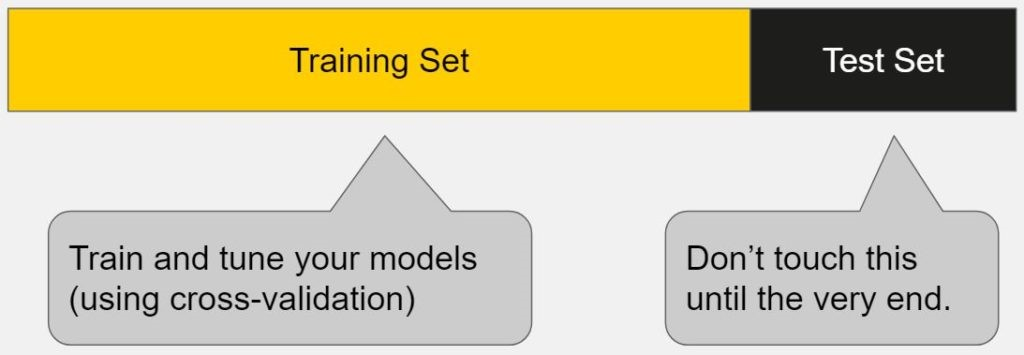
 
 **Train-Test Split**

This method can approximate of how well our model will perform on new data. If our model does much better on the training set than on the test set, then we’re likely overfitting.
For example, it would be a big red flag if our model saw 99% accuracy on the training set but only 55% accuracy on the test set.
Another tip is to start with a very simple model to serve as a benchmark. Then, as you try more complex algorithms, you’ll have a reference point to see if the additional complexity is worth it. This is the Occam’s razor test. If two models have comparable performance, then you should usually pick the simpler one.

**Damage caused by Overfitting**

•	Overfitting makes the model relevant to its data set only, and irrelevant to any other data sets.

**Reasons for Overfitting**

•	Data used for training is not cleaned and contains noise (garbage values) in it

•	The model has a high variance

•	The size of the training dataset used is not enough

•	The model is too complex

**Ways to Tackle Overfitting**

•	Using K-fold cross-validation

•	Using Regularization techniques such as Lasso and Ridge

•	Training model with sufficient data

•	Adopting ensembling techniques
